In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/hate_speech_hindi_final.csv")

In [ ]:
# Shape of dataset (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (39865, 8)


In [ ]:
# Column names
print("Columns:", df.columns.tolist())

Columns: ['text', 'clean_text', 'text_no_stopwords', 'defamation', 'hate', 'non-hate', 'violence', 'vulgar']


In [ ]:
# Data types of each column
print("Data types:\n", df.dtypes)

Data types:
 text                 object
clean_text           object
text_no_stopwords    object
defamation            int64
hate                  int64
non-hate              int64
violence              int64
vulgar                int64
dtype: object


In [ ]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 text                 0
clean_text           0
text_no_stopwords    0
defamation           0
hate                 0
non-hate             0
violence             0
vulgar               0
dtype: int64


In [ ]:
# Summary statistics for numeric columns
print("Summary stats:\n", df.describe())

Summary stats:
          defamation          hate      non-hate      violence        vulgar
count  39865.000000  39865.000000  39865.000000  39865.000000  39865.000000
mean       0.250847      0.250847      0.250847      0.250847      0.250847
std        0.433506      0.433506      0.433506      0.433506      0.433506
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        1.000000      1.000000      1.000000      1.000000      1.000000
max        1.000000      1.000000      1.000000      1.000000      1.000000


In [ ]:
# First 5 rows
print("Sample rows:\n", df.head())

Sample rows:
                                                 text  \
0  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...   
1  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...   
2  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...   
3  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...   
4  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...   

                                          clean_text  \
0  मेरे देश के हिन्दु बहुत निराले है कुछ तो पक्के...   
1  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...   
2  सुशांत ने जो बिजनेस डील जून को की थी वो डील दी...   
3  साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते ...   
4  unlockguidelines अनलॉक के लिए गाइडलाइन्स जारी ...   

                                   text_no_stopwords  defamation  hate  \
0  मेरे देश हिन्दु निराले है पक्के राम भक्त है बा...           0     1   
1  सरकार हमेशा किसानों कमाई बढ़ाने नईनई स्कीमें ल...           0     0   
2  सुशांत बिजनेस डील जून थी वो डील दीपेश सुशांत ह...           0     0   
3  साले जेएनयू छ

# **EDA**

In [ ]:
import matplotlib.pyplot as plt

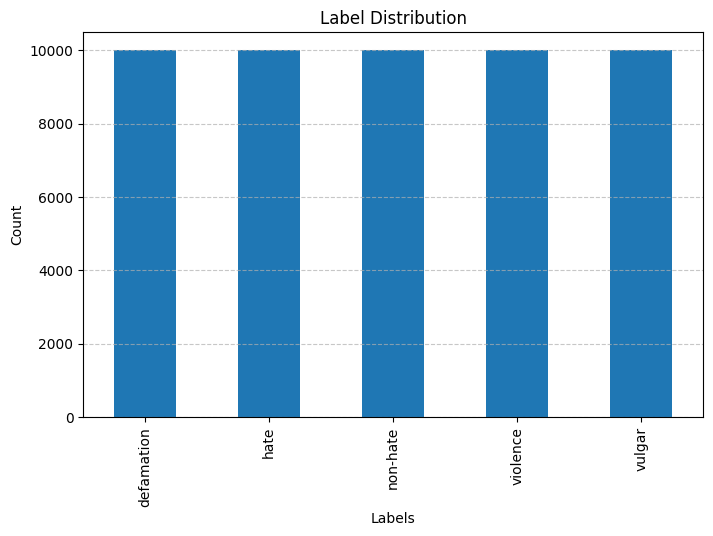

In [ ]:
label_cols = ['defamation', 'hate', 'non-hate', 'violence', 'vulgar']
label_counts = df[label_cols].sum()

plt.figure(figsize=(8,5))
label_counts.plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Text length stats:
 count    39865.000000
mean        24.245529
std         15.450593
min          2.000000
25%         13.000000
50%         20.000000
75%         32.000000
max        138.000000
Name: text_length, dtype: float64


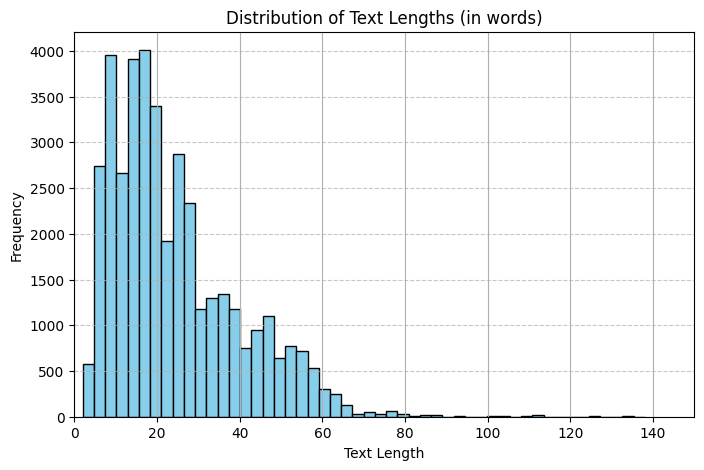

In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
print("\nText length stats:\n", df['text_length'].describe())

plt.figure(figsize=(8,5))
df['text_length'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Text Lengths (in words)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.xlim(0, 150)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Number of labels per sample:
 num_labels
1    33396
2     3378
3     2516
4      575
Name: count, dtype: int64


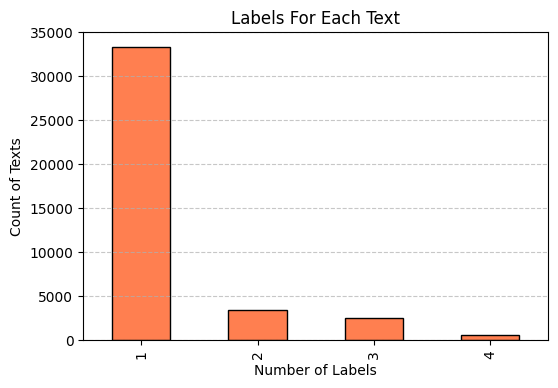

In [ ]:
df['num_labels'] = df[label_cols].sum(axis=1)
print("\nNumber of labels per sample:\n", df['num_labels'].value_counts())

plt.figure(figsize=(6,4))
df['num_labels'].value_counts().sort_index().plot(kind='bar', color='coral', edgecolor='black')
plt.title("Labels For Each Text")
plt.xlabel("Number of Labels")
plt.ylabel("Count of Texts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import seaborn as sns

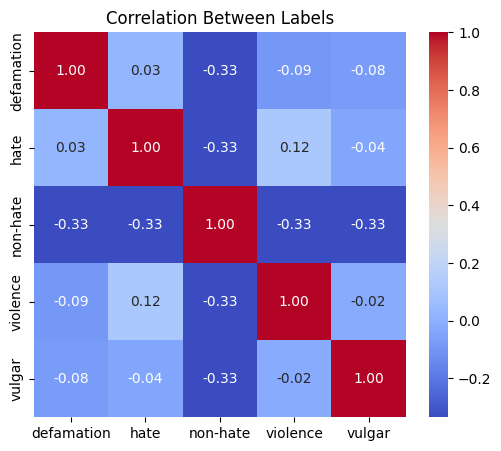

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df[label_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Labels")
plt.show()


Average text length per label:
 {'defamation': np.float64(25.4778), 'hate': np.float64(23.2341), 'non-hate': np.float64(23.0335), 'violence': np.float64(19.1984), 'vulgar': np.float64(25.106)}


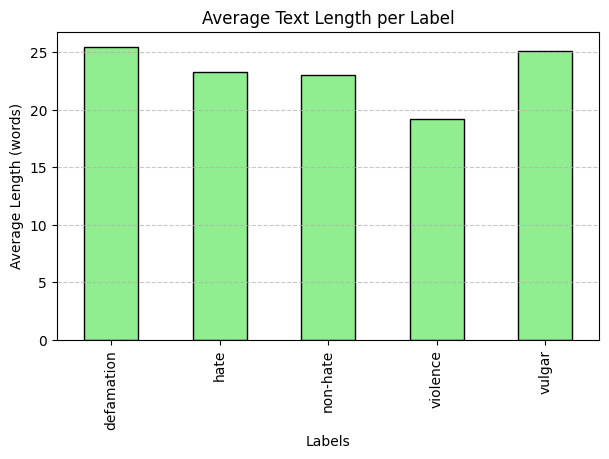

In [ ]:
avg_len_per_label = {col: df[df[col] == 1]['text_length'].mean() for col in label_cols}
print("\nAverage text length per label:\n", avg_len_per_label)

plt.figure(figsize=(7,4))
pd.Series(avg_len_per_label).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Average Text Length per Label")
plt.xlabel("Labels")
plt.ylabel("Average Length (words)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()